#Import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [ ]:
def ms_to_mn(df,column):
  df["execution_time(minutes)"] = (df[column].astype(float))/60000
  df = df.drop([column],axis=1)
  return df

In [ ]:
mul = pd.read_csv("/content/drive/MyDrive/Continuation Queries/muls.csv")
opt = pd.read_csv("/content/drive/MyDrive/Continuation Queries/opts.csv")

## Clean reported data for 4 approaches:
- BG: Blazegraph
- JN: Apache Jena
- PS: Passage
- S: Sage

In [ ]:
BG_mul_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/bg/report-wdbench-multiple-tps-1-cpus.csv",delimiter=" ")
BG_mul_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/bg/report-wdbench-multiple-tps-4-cpus.csv",delimiter=" ")
BG_opt_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/bg/report-wdbench-opts-1-cpus.csv",delimiter=" ")
BG_opt_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/bg/report-wdbench-opts-4-cpus.csv",delimiter=" ")

In [ ]:
BG_mul = pd.concat([BG_mul_1, BG_mul_4], ignore_index=True)
BG_opt = pd.concat([BG_opt_1, BG_opt_4], ignore_index=True)
BG_mul = ms_to_mn(BG_mul,"execution_time(ms)")
BG_opt = ms_to_mn(BG_opt,"execution_time(ms)")
BG_mul = pd.merge(BG_mul, mul, on=["query_name"], how='inner')
BG_opt = pd.merge(BG_opt, opt, on=["query_name"], how='inner')
BG_mul = BG_mul.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
BG_opt = BG_opt.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
print(BG_mul.shape)
print(BG_opt.shape)
BG_mul.head()

(294, 5)
(264, 7)


,query_name,run,cpus,execution_time(minutes),nb_triples
0,query_394,run_1,1-cpus,2.428117,2
1,query_394,run_2,1-cpus,2.290883,2
2,query_394,run_3,1-cpus,2.371583,2
3,query_466,run_1,1-cpus,3.890633,3
4,query_466,run_2,1-cpus,3.422217,3


In [ ]:
JN_mul_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/jena/report-wdbench-multiple-tps-1-cpus.csv",delimiter=" ")
JN_mul_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/jena/report-wdbench-multiple-tps-4-cpus.csv",delimiter=" ")
JN_opt_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/jena/report-wdbench-opts-1-cpus.csv",delimiter=" ")
JN_opt_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/jena/report-wdbench-opts-4-cpus.csv",delimiter=" ")
JN_mul = pd.concat([JN_mul_1, JN_mul_4], ignore_index=True)
JN_opt = pd.concat([JN_opt_1, JN_opt_4], ignore_index=True)
JN_mul['execution_time(ms)'] = JN_mul['execution_time(ms)'].replace('timeout', 600)
JN_opt['execution_time(ms)'] = JN_opt['execution_time(ms)'].replace('timeout', 600)
JN_mul['execution_time(ms)'] = JN_mul['execution_time(ms)'].replace(0, 600)
JN_opt['execution_time(ms)'] = JN_opt['execution_time(ms)'].replace(0, 600)
JN_mul['execution_time(ms)'] = JN_mul['execution_time(ms)'].fillna(600)
JN_opt['execution_time(ms)'] = JN_opt['execution_time(ms)'].fillna(600)
JN_mul['execution_time(minutes)'] = JN_mul['execution_time(ms)'].astype(float)/60
JN_opt['execution_time(minutes)'] = JN_opt['execution_time(ms)'].astype(float)/60
JN_mul = JN_mul.drop(["execution_time(ms)"],axis=1)
JN_opt = JN_opt.drop(["execution_time(ms)"],axis=1)
JN_mul = pd.merge(JN_mul, mul, on=["query_name"], how='inner')
JN_opt = pd.merge(JN_opt, opt, on=["query_name"], how='inner')
JN_mul = JN_mul.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
JN_opt = JN_opt.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
print(JN_mul.shape)
print(JN_opt.shape)
JN_mul.head()

(294, 5)
(264, 7)


,query_name,run,cpus,execution_time(minutes),nb_triples
0,query_394,run_1,1-cpus,6.473717,2
1,query_394,run_2,1-cpus,6.755767,2
2,query_394,run_3,1-cpus,6.564800,2
3,query_466,run_1,1-cpus,9.122183,3
4,query_466,run_2,1-cpus,8.861267,3


In [ ]:
PS_mul_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/passage/report-wdbench-multiple-tps-1-cpus.csv",delimiter=",")
PS_mul_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/passage/report-wdbench-multiple-tps-4-cpus.csv",delimiter=",")
PS_opt_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/passage/report-wdbench-opts-1-cpus.csv",delimiter=",")
PS_opt_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/passage/report-wdbench-opts-4-cpus.csv",delimiter=",")
PS_mul_1['cpus'] = '1-cpus'
PS_mul_4['cpus'] = '4-cpus'
PS_opt_1['cpus'] = '1-cpus'
PS_opt_4['cpus'] = '4-cpus'
PS_mul = pd.concat([PS_mul_1, PS_mul_4], ignore_index=True)
PS_opt = pd.concat([PS_opt_1, PS_opt_4], ignore_index=True)
PS_mul = ms_to_mn(PS_mul,"execution_time")
PS_opt = ms_to_mn(PS_opt,"execution_time")
PS_mul = pd.merge(PS_mul, mul, on=["query_name"], how='inner')
PS_opt = pd.merge(PS_opt, opt, on=["query_name"], how='inner')
PS_mul = PS_mul.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
PS_opt = PS_opt.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
print(PS_mul.shape)
print(PS_opt.shape)
PS_mul.head()

(588, 7)
(528, 9)


,query_name,run,timeout,nb_pause_resume,cpus,execution_time(minutes),nb_triples
0,query_394,run_1,60000,1,1-cpus,1.202800,2
1,query_394,run_2,60000,1,1-cpus,1.223783,2
2,query_394,run_3,60000,1,1-cpus,1.195667,2
3,query_394,run_1,60000000,0,1-cpus,1.204750,2
4,query_394,run_2,60000000,0,1-cpus,1.217367,2


### Total number of Continuation Queries for PASSAGE and total number of Suspend-Resume for SaGe

In [ ]:
PS_mul_1[PS_mul_1['nb_pause_resume'] != 0].groupby('query_name').agg({'nb_pause_resume': ['mean']}).sum()


,,0
nb_pause_resume,mean,62.666667


In [ ]:
PS_mul_4[PS_mul_4['nb_pause_resume'] != 0].groupby('query_name').agg({'nb_pause_resume': ['mean']}).sum()

,,0
nb_pause_resume,mean,57.0


In [ ]:
PS_opt_1[PS_opt_1['nb_pause_resume'] != 0].groupby('query_name').agg({'nb_pause_resume': ['mean']}).sum()

,,0
nb_pause_resume,mean,41.666667


In [ ]:
PS_opt_4[PS_opt_4['nb_pause_resume'] != 0].groupby('query_name').agg({'nb_pause_resume': ['mean']}).sum()



,,0
nb_pause_resume,mean,30.333333


In [ ]:

S_mul_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/sage/report-wdbench-multiple-tps-1-cpus.csv",delimiter=",")
S_mul_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/sage/report-wdbench-multiple-tps-4-cpus.csv",delimiter=",")
S_opt_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/sage/report-wdbench-opts-1-cpus.csv",delimiter=",")
S_opt_4 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/sage/report-wdbench-opts-4-cpus.csv",delimiter=",")
S_mul = pd.concat([S_mul_1, S_mul_4], ignore_index=True)
S_opt = pd.concat([S_opt_1, S_opt_4], ignore_index=True)

def clean(df):
    df['next_size(kb)'] = df['next_size(kb)'].str.replace(' kb', '', regex=False).astype(float)
    df['execution_time(sec)'] = df['execution_time(sec)'].str.replace(' sec', '', regex=False).astype(float)
clean(S_mul)
clean(S_opt)
S_mul['execution_time(minutes)'] = S_mul['execution_time(sec)']/60
S_opt['execution_time(minutes)'] = S_opt['execution_time(sec)']/60
S_mul = S_mul.drop(["execution_time(sec)"],axis=1)
S_opt = S_opt.drop(["execution_time(sec)"],axis=1)
S_mul = S_mul.rename(columns={'run_id': 'run'})
S_opt = S_opt.rename(columns={'run_id': 'run'})
S_mul = pd.merge(S_mul, mul, on=["query_name"], how='inner')
S_opt = pd.merge(S_opt, opt, on=["query_name"], how='inner')
S_mul = S_mul.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
S_opt = S_opt.drop(columns = ["nb_results_x","nb_results_y"],axis=1)
print(S_mul.shape)
print(S_opt.shape)
S_mul.head()

(588, 8)
(528, 10)


,query_name,timeout,run,cpus,nb_quantum,next_size(kb),execution_time(minutes),nb_triples
0,query_394,60000,run_1,1-cpus,2,0.790039,1.922319,2
1,query_394,60000000,run_1,1-cpus,1,0.015625,1.849252,2
2,query_394,60000,run_2,1-cpus,2,0.793945,1.906857,2
3,query_394,60000000,run_2,1-cpus,1,0.015625,1.884844,2
4,query_394,60000,run_3,1-cpus,2,0.891602,1.928859,2


In [ ]:
S_mul_1_60s = S_mul_1[S_mul_1['timeout'] == 60000]
S_mul_4_60s = S_mul_4[S_mul_4['timeout'] == 60000]
S_opt_1_60s = S_opt_1[S_opt_1['timeout'] == 60000]
S_opt_4_60s = S_opt_4[S_opt_4['timeout'] == 60000]

In [ ]:
S_mul_1_60s[S_mul_1_60s['nb_quantum'] != 1].groupby('query_name').agg({'nb_quantum': ['mean']}).sum()


,,0
nb_quantum,mean,292.666667


In [ ]:
S_mul_4_60s[S_mul_4_60s['nb_quantum'] != 1].groupby('query_name').agg({'nb_quantum': ['mean']}).sum()

,,0
nb_quantum,mean,296.0


In [ ]:
S_opt_1_60s[S_opt_1_60s['nb_quantum'] != 1].groupby('query_name').agg({'nb_quantum': ['mean']}).sum()

,,0
nb_quantum,mean,152.666667


In [ ]:
S_opt_4_60s[S_opt_4_60s['nb_quantum'] != 1].groupby('query_name').agg({'nb_quantum': ['mean']}).sum()

,,0
nb_quantum,mean,153.666667


In [ ]:
S_mul_60s = S_mul[S_mul['timeout'] == 60000]
S_opt_60s = S_opt[S_opt['timeout'] == 60000]
print(S_mul_60s.shape)
print(S_opt_60s.shape)
PS_mul_60s = PS_mul[PS_mul['timeout'] == 60000]
PS_opt_60s = PS_opt[PS_opt['timeout'] == 60000]
print(PS_mul_60s.shape)
print(PS_opt_60s.shape)
S_mul_60s = S_mul_60s.drop(columns = ["timeout"],axis=1)
S_opt_60s = S_opt_60s.drop(columns = ["timeout"],axis=1)
PS_mul_60s = PS_mul_60s.drop(columns = ["timeout"],axis=1)
PS_opt_60s = PS_opt_60s.drop(columns = ["timeout"],axis=1)

(294, 8)
(264, 10)
(294, 7)
(264, 9)


In [ ]:
df_mul = pd.merge(BG_mul, JN_mul, on=["query_name", "run", "nb_triples", "cpus"], how='inner', suffixes=('_BG', '_JN'))
PS_mul_60s = PS_mul_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_PS_60s'})
df_mul = pd.merge(df_mul, PS_mul_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
S_mul_60s = S_mul_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_S_60s'})
df_mul = pd.merge(df_mul, S_mul_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
print(df_mul.shape)
print(df_mul.columns)

(294, 11)
Index(['query_name', 'run', 'cpus', 'execution_time(minutes)_BG', 'nb_triples',
       'execution_time(minutes)_JN', 'nb_pause_resume',
       'execution_time(minutes)_PS_60s', 'nb_quantum', 'next_size(kb)',
       'execution_time(minutes)_S_60s'],
      dtype='object')


In [ ]:
df_opt = pd.merge(BG_opt, JN_opt, on=["query_name", "run", "nb_triples", "cpus"], how='inner', suffixes=('_BG', '_JN'))
PS_opt_60s = PS_opt_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_PS_60s'})
df_opt = pd.merge(df_opt, PS_opt_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
S_opt_60s = S_opt_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_S_60s'})
df_opt = pd.merge(df_opt, S_opt_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
print(df_opt.shape)
print(df_opt.columns)


(264, 19)
Index(['query_name', 'run', 'cpus', 'execution_time(minutes)_BG', 'nb_triples',
       'nb_triple_opts_BG', 'nb_opts_BG', 'execution_time(minutes)_JN',
       'nb_triple_opts_JN', 'nb_opts_JN', 'nb_pause_resume',
       'execution_time(minutes)_PS_60s', 'nb_triple_opts_x', 'nb_opts_x',
       'nb_quantum', 'next_size(kb)', 'execution_time(minutes)_S_60s',
       'nb_triple_opts_y', 'nb_opts_y'],
      dtype='object')


### PLots

In [ ]:
df_mul_1_all = df_mul[df_mul['cpus'] == '1-cpus']
df_mul_4_all = df_mul[df_mul['cpus'] == '4-cpus']
df_opt_1_all = df_opt[df_opt['cpus'] == '1-cpus']
df_opt_4_all = df_opt[df_opt['cpus'] == '4-cpus']
print(df_mul_1_all.shape)
print(df_mul_4_all.shape)
print(df_opt_1_all.shape)
print(df_opt_4_all.shape)

(147, 11)
(147, 11)
(132, 19)
(132, 19)


#### just doucble check for sure!

In [ ]:
print(len(df_mul_1_all['query_name'].unique()))
print(len(df_mul_4_all['query_name'].unique()))
print(len(df_opt_1_all['query_name'].unique()))
print(len(df_opt_4_all['query_name'].unique()))

49
49
44
44


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_execution_times_grouped_by_triples(df,bb):
    # Calculate mean and standard deviation for each group
    stats = df.groupby(["query_name", "nb_triples"], as_index=False).agg({
        "execution_time(minutes)_BG": ['mean', 'std'],
        "execution_time(minutes)_PS_60s": ['mean', 'std'],
        "execution_time(minutes)_S_60s": ['mean', 'std'],
        "execution_time(minutes)_JN": ['mean', 'std']
    })

    # Flatten the MultiIndex columns
    stats.columns = ['query_name', 'nb_triples',
                     'execution_time_BG_mean', 'execution_time_BG_std',
                     'execution_time_PS_60s_mean', 'execution_time_PS_60s_std',
                     'execution_time_S_60s_mean', 'execution_time_S_60s_std',
                     'execution_time_JN_mean', 'execution_time_JN_std']

    # Limit execution times to 10 minutes
    for col in ['execution_time_BG_mean', 'execution_time_PS_60s_mean',
                'execution_time_S_60s_mean', 'execution_time_JN_mean']:
        stats.loc[stats[col] > 10, [col, col.replace('_mean', '_std')]] = [10, 0]

    # Sort values by 'nb_triples' and then by Blazegraph execution time
    stats.sort_values(by=['nb_triples', 'execution_time_BG_mean'], inplace=True)
    stats.reset_index(drop=True, inplace=True)

    # Adjust bar width and gaps
    bar_width = 0.2  # Decrease bar width to make bars narrower
    scale = 0.75
    fontsize = 12
    fig, ax = plt.subplots(figsize=(20 * scale, 6 * scale))

    # Create a list of positions with gaps between groups
    gap_between_groups = 1.4  # Adjust gap between groups
    gap_within_group = 1    # Increase gap between bars within groups
    triples_groups = stats['nb_triples'].unique()
    positions = []
    group_centers = []
    current_pos = 0
    query_positions = {}

    for i, triples in enumerate(triples_groups):
        group_df = stats[stats['nb_triples'] == triples]
        group_size = len(group_df)
        group_positions = np.arange(current_pos, current_pos + group_size * gap_within_group, gap_within_group)
        positions.extend(group_positions)
        group_centers.append((group_positions[0] + group_positions[-1]) / 2)
        current_pos = group_positions[-1] + gap_between_groups

        # Store positions for each query
        for j, query in enumerate(group_df['query_name']):
            query_positions[query] = group_positions[j]

        # Add shading to differentiate groups
        if i % 2 != 0:
            ax.axvspan(group_positions[0] - bar_width * 3, group_positions[-1] + bar_width * 3, facecolor='lightgrey', alpha=0.25)

    # Plot bars with error bars
    methods = [
        ('blazegraph', 'execution_time_BG_mean', 'execution_time_BG_std', mcolors.CSS4_COLORS['deepskyblue']),
        ('passage 60s', 'execution_time_PS_60s_mean', 'execution_time_PS_60s_std', mcolors.CSS4_COLORS['green']),
        ('sage 60s', 'execution_time_S_60s_mean', 'execution_time_S_60s_std', mcolors.CSS4_COLORS['orchid']),
        ('jena', 'execution_time_JN_mean', 'execution_time_JN_std', mcolors.CSS4_COLORS['red'])
    ]

    offsets = [-1.5 * bar_width, -0.5 * bar_width, 0.5 * bar_width, 1.5 * bar_width]

    for offset, (label, mean_col, std_col, color) in zip(offsets, methods):
        x_positions = [query_positions[q] + offset for q in stats['query_name']]
        means = stats[mean_col]
        stds = stats[std_col]
        ax.bar(x_positions, means, bar_width,
               yerr=stds, label=label, color=color, alpha=0.4,
               error_kw=dict(capsize=0, ecolor='black', linewidth=1.5,alpha=0.6))

        # Add 'timeout' labels where the mean is 10 (since we capped at 10)
        for x_pos, mean in zip(x_positions, means):
            if mean == 10:
                ax.text(x_pos, mean + 0.02, 't', ha='center', va='bottom', fontsize=8, color='red', fontweight='bold')

    # Add labels for each number of triples group
    for i, triples in enumerate(triples_groups):
        x_pos = group_centers[i]
        ax.text(x_pos, 1.02 * ax.get_ylim()[1], f"{int(triples)} tps", ha='center', va='center', fontsize=fontsize-4)

    # Replace 'query_' with 'q' in the 'query_name' column for display purposes
    stats['query_name_short'] = stats['query_name'].str.replace('query_', 'q')

    # Set x-ticks and labels using the shortened query names
    ax.set_xticks([query_positions[q] for q in stats['query_name']])
    ax.set_xticklabels(stats['query_name_short'], rotation=90, fontsize=8)


    # Set y-axis limits and labels
    max_time = stats[[col for col in stats.columns if 'mean' in col]].max().max()
    ax.set_ylim(0, max_time * 1.05)
    ax.set_yticks(np.arange(0, max_time * 1.05, 1))
    ax.set_ylabel("execution time (minutes)", fontsize=fontsize-2)
    ax.tick_params(axis='both', length=1, width=0.5)
    # Set x-axis limits to decrease whitespace
    ax.set_xlim(positions[0] - bar_width * 3, positions[-1] + bar_width * 3)

    # Add legend
    ax.legend(loc='upper center', fontsize=9, bbox_to_anchor=bb, ncol=1)

    # Add grid
    ax.grid(True, linestyle='dashed', linewidth=0.37, axis='y')
    ax.axhline(y=1, color='red', linestyle='--', linewidth=0.7)
    for spine in ax.spines.values():
        spine.set_alpha(0.3)
    # Adjust layout
    plt.tight_layout()

    plt.show()


### Multiple triple patterns - 1vCPU

> Add blockquote



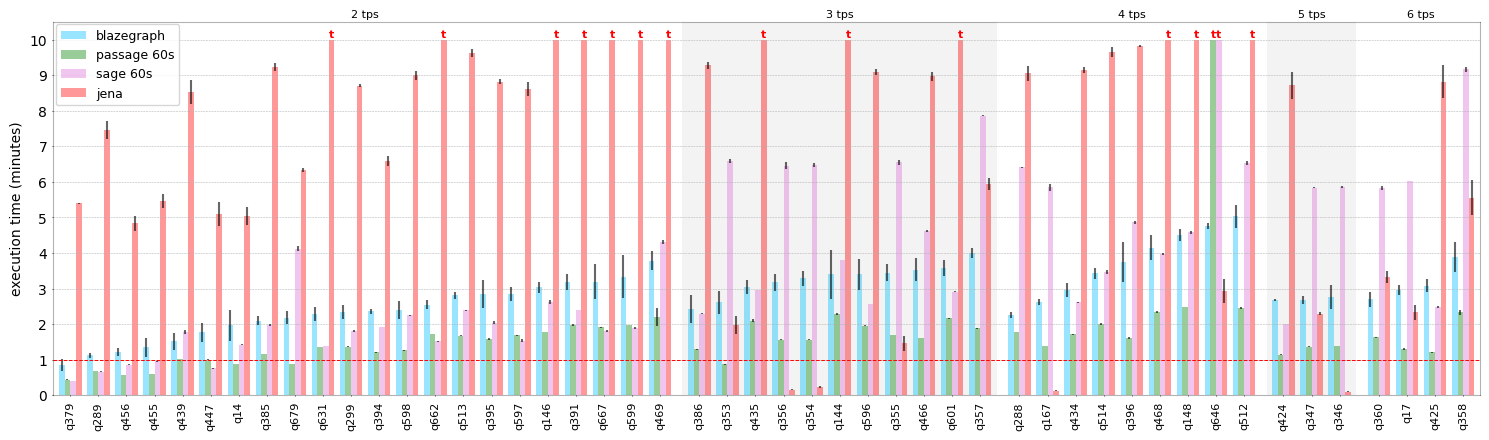

In [ ]:
plot_execution_times_grouped_by_triples(df_mul_1_all,(0.045, 1.01))



### Multiple triple patterns - 4vCPU

In [ ]:
# Check for specific query name
BG_mul_1[BG_mul_1['query_name'] == 'query_14']

,query_name,run,cpus,nb_results,execution_time(ms)
78,query_14,run_1,1-cpus,2525063,147927
79,query_14,run_2,1-cpus,2525063,101134
80,query_14,run_3,1-cpus,2525063,105210


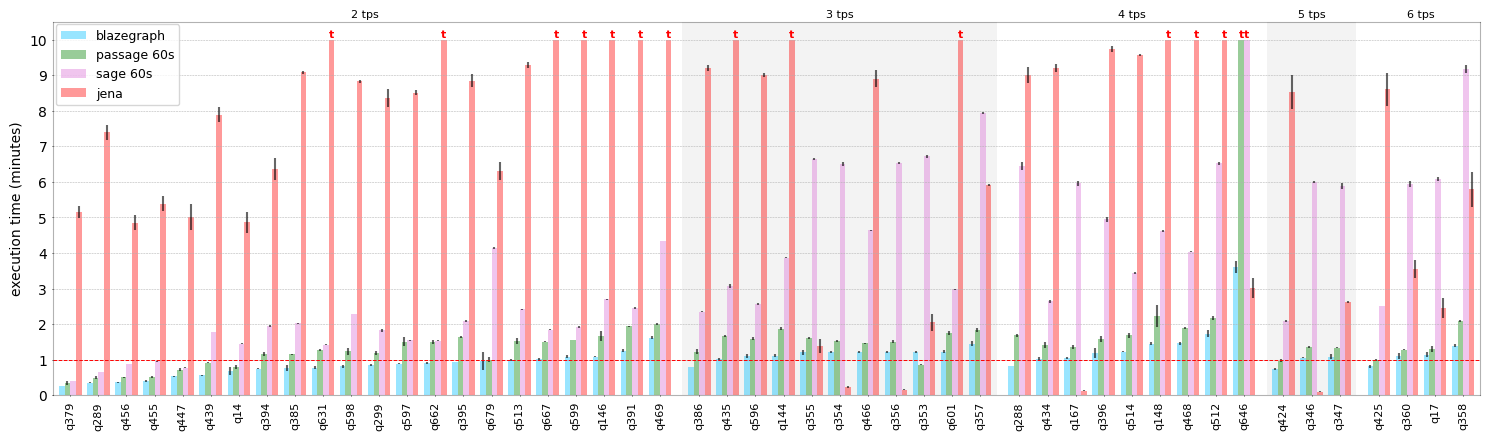

In [ ]:
plot_execution_times_grouped_by_triples(df_mul_4_all,(0.045, 1.01))

### OPTIONAL Queries with 1 vCPU

In [ ]:
## new version Blazegraph => delete some query that not pass 1 minute!
queries_to_exclude = ['query_42', 'query_44', 'query_278','query_267','query_116','query_115']
df_opt_1_all = df_opt_1_all[~df_opt_1_all['query_name'].isin(queries_to_exclude)]
df_opt_1_all = df_opt_1_all.reset_index(drop=True)
df_opt_4_all = df_opt_4_all[~df_opt_4_all['query_name'].isin(queries_to_exclude)]
df_opt_4_all = df_opt_4_all.reset_index(drop=True)

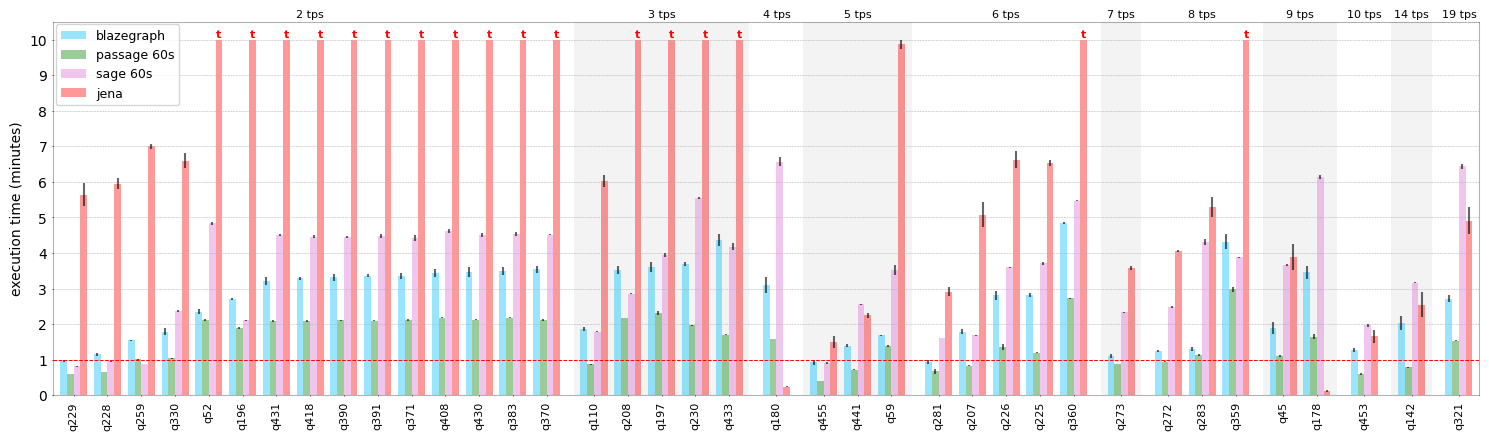

In [ ]:
plot_execution_times_grouped_by_triples(df_opt_1_all,(0.045, 1.01) )

### OPTIONAL Queries with 4 vCPU

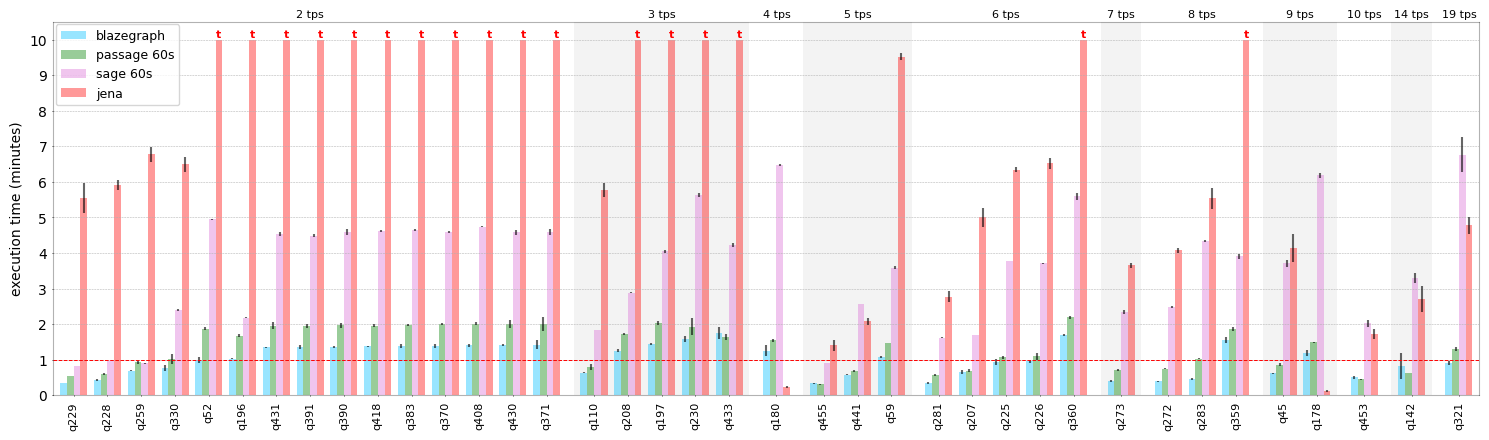

In [ ]:
plot_execution_times_grouped_by_triples(df_opt_4_all,(0.045, 1.01))

## Aggregate results

In [ ]:
#filter out queries _exclude in OPTS
PS_opt = PS_opt[~PS_opt['query_name'].isin(queries_to_exclude)]
PS_opt = PS_opt.reset_index(drop=True)
S_opt = S_opt[~S_opt['query_name'].isin(queries_to_exclude)]
S_opt = S_opt.reset_index(drop=True)
BG_opt = BG_opt[~BG_opt['query_name'].isin(queries_to_exclude)]
BG_opt = BG_opt.reset_index(drop=True)
JN_opt = JN_opt[~JN_opt['query_name'].isin(queries_to_exclude)]
JN_opt = JN_opt.reset_index(drop=True)


In [ ]:
PS_mul_60s = PS_mul[PS_mul['timeout'] == 60000]
PS_opt_60s = PS_opt[PS_opt['timeout'] == 60000]
PS_mul_notimeout = PS_mul[PS_mul['timeout'] != 60000]
PS_opt_notimeout = PS_opt[PS_opt['timeout'] != 60000]
S_mul_60s = S_mul[S_mul['timeout'] == 60000]
S_opt_60s = S_opt[S_opt['timeout'] == 60000]
S_mul_notimeout = S_mul[S_mul['timeout'] != 60000]
S_opt_notimeout = S_opt[S_opt['timeout'] != 60000]

In [ ]:

PS_mul_60s = PS_mul_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_PS_60s'})
PS_mul_notimeout = PS_mul_notimeout.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_PS_notimeout'})
S_mul_60s = S_mul_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_S_60s'})
S_mul_notimeout = S_mul_notimeout.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_S_notimeout'})


In [ ]:
PS_opt_60s = PS_opt_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_PS_60s'})
PS_opt_notimeout = PS_opt_notimeout.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_PS_notimeout'})
S_opt_60s = S_opt_60s.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_S_60s'})
S_opt_notimeout = S_opt_notimeout.rename(columns={'execution_time(minutes)': 'execution_time(minutes)_S_notimeout'})

In [ ]:
df_mul = pd.merge(BG_mul, JN_mul, on=["query_name", "run", "nb_triples", "cpus"], how='inner', suffixes=('_BG', '_JN'))
df_mul = pd.merge(df_mul, PS_mul_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
df_mul = pd.merge(df_mul, PS_mul_notimeout, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
df_mul = pd.merge(df_mul, S_mul_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
df_mul = df_mul.drop(columns = ["timeout_x","timeout_y"],axis=1)
df_mul = df_mul.rename(columns={'nb_pause_resume_x': 'nb_pause_resume_PS_60s','nb_pause_resume_y': 'nb_pause_resume_PS'})
df_mul = pd.merge(df_mul, S_mul_notimeout, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
print(df_mul.shape)
print(df_mul.columns)

(294, 18)
Index(['query_name', 'run', 'cpus', 'execution_time(minutes)_BG', 'nb_triples',
       'execution_time(minutes)_JN', 'nb_pause_resume_PS_60s',
       'execution_time(minutes)_PS_60s', 'nb_pause_resume_PS',
       'execution_time(minutes)_PS_notimeout', 'timeout_x', 'nb_quantum_x',
       'next_size(kb)_x', 'execution_time(minutes)_S_60s', 'timeout_y',
       'nb_quantum_y', 'next_size(kb)_y',
       'execution_time(minutes)_S_notimeout'],
      dtype='object')


In [ ]:
df_opt = pd.merge(BG_opt, JN_opt, on=["query_name", "run", "nb_triples", "cpus"], how='inner', suffixes=('_BG', '_JN'))
df_opt = pd.merge(df_opt, PS_opt_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
df_opt = pd.merge(df_opt, PS_opt_notimeout, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
df_opt = pd.merge(df_opt, S_opt_60s, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
df_opt = df_opt.drop(columns = ["timeout_x","timeout_y",'nb_triple_opts_x','nb_triple_opts_y','nb_opts_x','nb_opts_y'],axis=1)
df_opt = df_opt.rename(columns={'nb_pause_resume_x': 'nb_pause_resume_PS_60s','nb_pause_resume_y': 'nb_pause_resume_PS'})
df_opt = pd.merge(df_opt, S_opt_notimeout, on=["query_name", "run", "nb_triples", "cpus"], how='inner')
print(df_opt.shape)
print(df_opt.columns)

(228, 26)
Index(['query_name', 'run', 'cpus', 'execution_time(minutes)_BG', 'nb_triples',
       'nb_triple_opts_BG', 'nb_opts_BG', 'execution_time(minutes)_JN',
       'nb_triple_opts_JN', 'nb_opts_JN', 'nb_pause_resume_PS_60s',
       'execution_time(minutes)_PS_60s', 'nb_pause_resume_PS',
       'execution_time(minutes)_PS_notimeout', 'timeout_x', 'nb_quantum_x',
       'next_size(kb)_x', 'execution_time(minutes)_S_60s', 'nb_triple_opts_x',
       'nb_opts_x', 'timeout_y', 'nb_quantum_y', 'next_size(kb)_y',
       'execution_time(minutes)_S_notimeout', 'nb_triple_opts_y', 'nb_opts_y'],
      dtype='object')


In [ ]:
df_mul_1_all = df_mul[df_mul['cpus'] == '1-cpus']
df_mul_4_all = df_mul[df_mul['cpus'] == '4-cpus']

In [ ]:
df_opt_1_all = df_opt[df_opt['cpus'] == '1-cpus']
df_opt_4_all = df_opt[df_opt['cpus'] == '4-cpus']

In [ ]:
# filter out the queries exclude
df_opt_1_all = df_opt_1_all[~df_opt_1_all['query_name'].isin(queries_to_exclude)]
df_opt_1_all = df_opt_1_all.reset_index(drop=True)
df_opt_4_all = df_opt_4_all[~df_opt_4_all['query_name'].isin(queries_to_exclude)]
df_opt_4_all = df_opt_4_all.reset_index(drop=True)
print(df_opt_1_all.shape)
print(df_opt_4_all.shape)


(114, 26)
(114, 26)


In [ ]:
columns_to_calculate = ['run',"execution_time(minutes)_BG","execution_time(minutes)_JN","execution_time(minutes)_PS_60s","execution_time(minutes)_PS_notimeout","execution_time(minutes)_S_60s","execution_time(minutes)_S_notimeout"]
sum_mul_1 = df_mul_1_all[columns_to_calculate].groupby('run').sum().mean()
sum_mul_1

,0
execution_time(minutes)_BG,141.172594
execution_time(minutes)_JN,347.760872
execution_time(minutes)_PS_60s,87.379311
execution_time(minutes)_PS_notimeout,86.584189
execution_time(minutes)_S_60s,279.019698
execution_time(minutes)_S_notimeout,277.921246


In [ ]:
sum_mul_4 = df_mul_4_all[columns_to_calculate].groupby('run').sum().mean()
sum_mul_4

,0
execution_time(minutes)_BG,51.488667
execution_time(minutes)_JN,347.405233
execution_time(minutes)_PS_60s,80.936317
execution_time(minutes)_PS_notimeout,79.956256
execution_time(minutes)_S_60s,281.346924
execution_time(minutes)_S_notimeout,277.421729


In [ ]:
sum_opt_1 = df_opt_1_all[columns_to_calculate].groupby('run').sum().mean()
sum_opt_1

,0
execution_time(minutes)_BG,97.692422
execution_time(minutes)_JN,262.300394
execution_time(minutes)_PS_60s,57.922083
execution_time(minutes)_PS_notimeout,57.135306
execution_time(minutes)_S_60s,134.790182
execution_time(minutes)_S_notimeout,129.195384


In [ ]:
sum_opt_4 = df_opt_4_all[columns_to_calculate].groupby('run').sum().mean()
sum_opt_4

,0
execution_time(minutes)_BG,37.724006
execution_time(minutes)_JN,264.001156
execution_time(minutes)_PS_60s,51.299694
execution_time(minutes)_PS_notimeout,50.568194
execution_time(minutes)_S_60s,137.153065
execution_time(minutes)_S_notimeout,129.034721


### compare average time

In [ ]:
average_times_df_mul_1 = {
    "BG_avg_execution_time": df_mul_1_all["execution_time(minutes)_BG"].mean(),
    "JN_avg_execution_time": df_mul_1_all["execution_time(minutes)_JN"].mean(),
    "PS_60s_avg_execution_time": df_mul_1_all["execution_time(minutes)_PS_60s"].mean(),
    "PS_notimeout_avg_execution_time": df_mul_1_all["execution_time(minutes)_PS_notimeout"].mean(),
    "S_60s_avg_execution_time": df_mul_1_all["execution_time(minutes)_S_60s"].mean(),
    "S_notimeout_avg_execution_time": df_mul_1_all["execution_time(minutes)_S_notimeout"].mean()
}
AVG_MUL_1 = pd.DataFrame(average_times_df_mul_1, index=[0])
AVG_MUL_1 = AVG_MUL_1*60
AVG_MUL_1.head()

,BG_avg_execution_time,JN_avg_execution_time,PS_60s_avg_execution_time,PS_notimeout_avg_execution_time,S_60s_avg_execution_time,S_notimeout_avg_execution_time
0,186.738403,446.797,118.753621,117.550532,382.472608,380.857977


In [ ]:
average_times_df_mul_4 = {
    "BG_avg_execution_time": df_mul_4_all["execution_time(minutes)_BG"].mean(),
    "JN_avg_execution_time": df_mul_4_all["execution_time(minutes)_JN"].mean(),
    "PS_60s_avg_execution_time": df_mul_4_all["execution_time(minutes)_PS_60s"].mean(),
    "PS_notimeout_avg_execution_time": df_mul_4_all["execution_time(minutes)_PS_notimeout"].mean(),
    "S_60s_avg_execution_time": df_mul_4_all["execution_time(minutes)_S_60s"].mean(),
    "S_notimeout_avg_execution_time": df_mul_4_all["execution_time(minutes)_S_notimeout"].mean()
}
AVG_MUL_4 = pd.DataFrame(average_times_df_mul_4, index=[0])
AVG_MUL_4 = AVG_MUL_4*60
AVG_MUL_4.head()

,BG_avg_execution_time,JN_avg_execution_time,PS_60s_avg_execution_time,PS_notimeout_avg_execution_time,S_60s_avg_execution_time,S_notimeout_avg_execution_time
0,63.047347,425.394163,99.105694,97.905619,344.506438,339.700076


In [ ]:
average_times_df_opt_1 = {
    "BG_avg_execution_time": df_opt_1_all["execution_time(minutes)_BG"].mean(),
    "JN_avg_execution_time": df_opt_1_all["execution_time(minutes)_JN"].mean(),
    "PS_60s_avg_execution_time": df_opt_1_all["execution_time(minutes)_PS_60s"].mean(),
    "PS_notimeout_avg_execution_time": df_opt_1_all["execution_time(minutes)_PS_notimeout"].mean(),
    "S_60s_avg_execution_time": df_opt_1_all["execution_time(minutes)_S_60s"].mean(),
    "S_notimeout_avg_execution_time": df_opt_1_all["execution_time(minutes)_S_notimeout"].mean()
}
AVG_OPT_1 = pd.DataFrame(average_times_df_opt_1, index=[0])
AVG_OPT_1 = AVG_OPT_1*60
AVG_OPT_1.head()

,BG_avg_execution_time,JN_avg_execution_time,PS_60s_avg_execution_time,PS_notimeout_avg_execution_time,S_60s_avg_execution_time,S_notimeout_avg_execution_time
0,154.251193,414.158518,91.455921,90.21364,212.826603,203.992711


In [ ]:
average_times_df_opt_4 = {
    "BG_avg_execution_time": df_opt_4_all["execution_time(minutes)_BG"].mean(),
    "JN_avg_execution_time": df_opt_4_all["execution_time(minutes)_JN"].mean(),
    "PS_60s_avg_execution_time": df_opt_4_all["execution_time(minutes)_PS_60s"].mean(),
    "PS_notimeout_avg_execution_time": df_opt_4_all["execution_time(minutes)_PS_notimeout"].mean(),
    "S_60s_avg_execution_time": df_opt_4_all["execution_time(minutes)_S_60s"].mean(),
    "S_notimeout_avg_execution_time": df_opt_4_all["execution_time(minutes)_S_notimeout"].mean()
}
OPT_4 = pd.DataFrame(average_times_df_opt_4, index=[0])
OPT_4 = OPT_4*60
OPT_4.head()

,BG_avg_execution_time,JN_avg_execution_time,PS_60s_avg_execution_time,PS_notimeout_avg_execution_time,S_60s_avg_execution_time,S_notimeout_avg_execution_time
0,60.091336,416.84393,80.999518,79.844518,216.557471,203.739033


### commpare over in space between SaGe and Passage

In [ ]:
ps_mul_1_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-mul-1-r1.csv",delimiter=",")
ps_mul_1_2 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-mul-1-r2.csv",delimiter=",")
ps_mul_1_3 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-mul-1-r3.csv",delimiter=",")
ps_mul_4_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-mul-4-r1.csv",delimiter=",")
ps_mul_4_2 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-mul-4-r2.csv",delimiter=",")
ps_mul_4_3 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-mul-4-r3.csv",delimiter=",")
ps_opt_1_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-opt-1-r1.csv",delimiter=",")
ps_opt_1_2 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-opt-1-r2.csv",delimiter=",")
ps_opt_1_3 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-opt-1-r3.csv",delimiter=",")
ps_opt_4_1 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-opt-4-r1.csv",delimiter=",")
ps_opt_4_2 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-opt-4-r2.csv",delimiter=",")
ps_opt_4_3 = pd.read_csv("/content/drive/MyDrive/Continuation Queries/report_query/report-wdbench-opt-4-r3.csv",delimiter=",")

In [ ]:
ps_mul_1_1['run'] = 'run_1'
ps_mul_1_2['run'] = 'run_2'
ps_mul_1_3['run'] = 'run_3'
ps_mul_4_1['run'] = 'run_1'
ps_mul_4_2['run'] = 'run_2'
ps_mul_4_3['run'] = 'run_3'
ps_mul_1_1['cpus'] = '1-cpus'
ps_mul_1_2['cpus'] = '1-cpus'
ps_mul_1_3['cpus'] = '1-cpus'
ps_mul_4_1['cpus'] = '4-cpus'
ps_mul_4_2['cpus'] = '4-cpus'
ps_mul_4_3['cpus'] = '4-cpus'

In [ ]:
ps_opt_1_1['run'] = 'run_1'
ps_opt_1_2['run'] = 'run_2'
ps_opt_1_3['run'] = 'run_3'
ps_opt_4_1['run'] = 'run_1'
ps_opt_4_2['run'] = 'run_2'
ps_opt_4_3['run'] = 'run_3'
ps_opt_1_1['cpus'] = '1-cpus'
ps_opt_1_2['cpus'] = '1-cpus'
ps_opt_1_3['cpus'] = '1-cpus'
ps_opt_4_1['cpus'] = '4-cpus'
ps_opt_4_2['cpus'] = '4-cpus'
ps_opt_4_3['cpus'] = '4-cpus'

In [ ]:
ps_mul_1 = pd.concat([ps_mul_1_1, ps_mul_1_2, ps_mul_1_3], ignore_index=True)
ps_mul_4 = pd.concat([ps_mul_4_1, ps_mul_4_2, ps_mul_4_3], ignore_index=True)
ps_opt_1 = pd.concat([ps_opt_1_1, ps_opt_1_2, ps_opt_1_3], ignore_index=True)
ps_opt_4 = pd.concat([ps_opt_4_1, ps_opt_4_2, ps_opt_4_3], ignore_index=True)

In [ ]:
# filter out query exclude
ps_opt_1 = ps_opt_1[~ps_opt_1['query_name'].isin(queries_to_exclude)]
ps_opt_1 = ps_opt_1.reset_index(drop=True)
ps_opt_4 = ps_opt_4[~ps_opt_4['query_name'].isin(queries_to_exclude)]
ps_opt_4 = ps_opt_4.reset_index(drop=True)


In [ ]:
def non_zero_mean(df):
  non_zero_df = df[df["sum_continuation_queries_size"] != 0]
  return non_zero_df

In [ ]:
ps_mul_1 = non_zero_mean(ps_mul_1)
ps_mul_4 = non_zero_mean(ps_mul_4)
ps_opt_1 = non_zero_mean(ps_opt_1)
ps_opt_4 = non_zero_mean(ps_opt_4)


In [ ]:
ps_mul_1.groupby('query_name')['sum_continuation_queries_size'].mean().mean()

0.821111111111111

In [ ]:
ps_mul_1.groupby('query_name')['nb_continuation_queries'].mean().mean()

1.492063492063492

In [ ]:
ps_mul_4.groupby('query_name')['sum_continuation_queries_size'].mean().mean()

0.7795121951219512

In [ ]:
ps_mul_4.groupby('query_name')['nb_continuation_queries'].mean().mean()

1.3902439024390243

In [ ]:
ps_opt_1.groupby('query_name')['sum_continuation_queries_size'].mean().mean()

0.8266666666666667

In [ ]:
ps_opt_1.groupby('query_name')['nb_continuation_queries'].mean().mean()

1.5555555555555556

In [ ]:
ps_opt_4.groupby('query_name')['sum_continuation_queries_size'].mean().mean()

0.6487179487179487

In [ ]:
ps_opt_4.groupby('query_name')['nb_continuation_queries'].mean().mean()

1.3717948717948718

In [ ]:
S_mul_60s = S_mul[S_mul['timeout'] == 60000]
S_opt_60s = S_opt[S_opt['timeout'] == 60000]
S_mul_60s_1 = S_mul_60s[S_mul_60s['cpus'] == '1-cpus']
S_mul_60s_4 = S_mul_60s[S_mul_60s['cpus'] == '4-cpus']
S_opt_60s_1 = S_opt_60s[S_opt_60s['cpus'] == '1-cpus']
S_opt_60s_4 = S_opt_60s[S_opt_60s['cpus'] == '4-cpus']

In [ ]:
#filter out query
S_opt_60s_1 = S_opt_60s_1[~S_opt_60s_1['query_name'].isin(queries_to_exclude)]
S_opt_60s_1 = S_opt_60s_1.reset_index(drop=True)
S_opt_60s_4 = S_opt_60s_4[~S_opt_60s_4['query_name'].isin(queries_to_exclude)]
S_opt_60s_4 = S_opt_60s_4.reset_index(drop=True)

In [ ]:
ps_mul_1.shape

(124, 7)

In [ ]:

#filter zero
S_mul_60s_1 = S_mul_60s_1[S_mul_60s_1["next_size(kb)"] != 0]
S_mul_60s_4 = S_mul_60s_4[S_mul_60s_4["next_size(kb)"] != 0]
S_opt_60s_1 = S_opt_60s_1[S_opt_60s_1["next_size(kb)"] != 0]
S_opt_60s_4 = S_opt_60s_4[S_opt_60s_4["next_size(kb)"] != 0]

In [ ]:
S_mul_60s_1.shape

(147, 8)

In [ ]:
S_mul_60s_1['space'] = S_mul_60s_1.apply(lambda row: row['next_size(kb)'] / (row['nb_quantum'] - 1) if row['nb_quantum'] != 1 else row['next_size(kb)'], axis=1)
S_opt_60s_1['space'] = S_opt_60s_1.apply(lambda row: row['next_size(kb)'] / (row['nb_quantum'] - 1) if row['nb_quantum'] != 1 else row['next_size(kb)'], axis=1)
S_mul_60s_4['space'] = S_mul_60s_4.apply(lambda row: row['next_size(kb)'] / (row['nb_quantum'] - 1) if row['nb_quantum'] != 1 else row['next_size(kb)'], axis=1)
S_opt_60s_4['space'] = S_opt_60s_4.apply(lambda row: row['next_size(kb)'] / (row['nb_quantum'] - 1) if row['nb_quantum'] != 1 else row['next_size(kb)'], axis=1)

In [ ]:
#check at query
S_mul_60s_1[S_mul_60s_1['query_name'] == 'query_289']

,query_name,timeout,run,cpus,nb_quantum,next_size(kb),execution_time(minutes),nb_triples,space
204,query_289,60000,run_1,1-cpus,1,0.015625,0.660255,2,0.015625
206,query_289,60000,run_2,1-cpus,1,0.015625,0.682052,2,0.015625
208,query_289,60000,run_3,1-cpus,1,0.015625,0.651087,2,0.015625


In [ ]:
S_mul_60s_1.groupby('query_name')['space'].mean().mean()

1.1824651659380083

In [ ]:
S_mul_60s_4.groupby('query_name')['space'].mean().mean()

1.1646589805623035

In [ ]:
S_opt_60s_1.groupby('query_name')['space'].mean().mean()

1.9271752786915204

In [ ]:
S_opt_60s_4.groupby('query_name')['space'].mean().mean()


1.9184726954104012

In [ ]:
S_mul_60s_1["nb_qt"] = S_mul_60s_1.apply(lambda row: row['nb_quantum'] - 1 if row['nb_quantum'] != 1 else 1, axis=1)
S_opt_60s_1["nb_qt"] = S_opt_60s_1.apply(lambda row: row['nb_quantum'] - 1 if row['nb_quantum'] != 1 else 1, axis=1)
S_mul_60s_4["nb_qt"] = S_mul_60s_4.apply(lambda row: row['nb_quantum'] - 1 if row['nb_quantum'] != 1 else 1, axis=1)
S_opt_60s_4["nb_qt"] = S_opt_60s_4.apply(lambda row: row['nb_quantum'] - 1 if row['nb_quantum'] != 1 else 1, axis=1)


In [ ]:
S_mul_60s_1.groupby('query_name')['nb_qt'].mean().mean()

5.1768707482993195

In [ ]:
S_mul_60s_4.groupby('query_name')['nb_qt'].mean().mean()

5.244897959183674

In [ ]:
S_opt_60s_1.groupby('query_name')['nb_qt'].mean().mean()

3.0701754385964914

In [ ]:
S_opt_60s_4.groupby('query_name')['nb_qt'].mean().mean()

3.096491228070175